Regression 

In [16]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight') 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

In [17]:
#loading the csv file
dataset=pd.read_csv('heart_2020_cleaned.csv')

In [18]:
#relationship analysis
#correlation analysis
cor = dataset.corr()
cor

BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109788      0.064131  -0.051822
PhysicalHealth  0.109788        1.000000      0.287987  -0.061387
MentalHealth    0.064131        0.287987      1.000000  -0.119717
SleepTime      -0.051822       -0.061387     -0.119717   1.000000

In [19]:
heart_cat = dataset.select_dtypes(include="object")
dataset["HeartDisease"] = dataset["HeartDisease"].replace({"No": 0, "Yes": 1})

In [20]:
#value_count
heart_cat.value_counts()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex     AgeCategory  Race   Diabetic                 PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer
No            No       No               No      No           Female  65-69        White  No                       Yes               Very good  No      No             No            1852
                                                             Male    18-24        White  No                       Yes               Very good  No      No             No            1746
                                                             Female  60-64        White  No                       Yes               Very good  No      No             No            1704
                                                             Male    18-24        White  No                       Yes               Excellent  No      No             No            1661
                                                             Female  55-59        W

In [21]:
dataset_dumm = pd.get_dummies(dataset)

In [22]:
y = dataset_dumm["HeartDisease"]
X = dataset_dumm.drop("HeartDisease", axis=1)
X_scaler = X[["BMI","PhysicalHealth","MentalHealth","SleepTime"]]
scaler = preprocessing.MinMaxScaler().fit(X_scaler)
X_scaled = scaler.transform(X_scaler)
X_scaled = pd.DataFrame(X_scaled, columns = ["BMI","PhysicalHealth","MentalHealth","SleepTime"])
X = X.drop(["BMI","PhysicalHealth","MentalHealth","SleepTime"], axis=1)
X = pd.concat([X, X_scaled], axis = 1)

In [23]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

In [28]:
#Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
reg.coef_

array([ 1.48594476e+08,  1.48594476e+08,  2.70357209e+11,  2.70357209e+11,
        5.99711077e+11,  5.99711077e+11, -5.05681714e+10, -5.05681714e+10,
       -7.11928352e+11, -7.11928352e+11, -1.98917464e+11, -1.98917464e+11,
       -1.98917464e+11, -1.98917464e+11, -1.98917464e+11, -1.98917464e+11,
       -1.98917464e+11, -1.98917464e+11, -1.98917464e+11, -1.98917464e+11,
       -1.98917464e+11, -1.98917464e+11, -1.98917464e+11, -2.46980199e+10,
       -2.46980199e+10, -2.46980199e+10, -2.46980199e+10, -2.46980199e+10,
       -2.46980199e+10,  6.51298951e+11,  6.51298951e+11,  6.51298951e+11,
        6.51298951e+11,  1.69431714e+11,  1.69431714e+11, -3.57314485e+11,
       -3.57314485e+11, -3.57314485e+11, -3.57314485e+11, -3.57314485e+11,
        4.20517026e+10,  4.20517026e+10, -1.27861053e+11, -1.27861053e+11,
       -1.27200751e+10, -1.27200751e+10,  1.10152477e-02,  1.22458595e-02,
       -5.96462625e-04, -2.14021342e-02])

In [30]:
#Prediction
pred = reg.predict(X_test)
pred

array([ 0.40325928,  0.10070801, -0.01724243, ...,  0.21328735,
        0.04058838,  0.01535034])

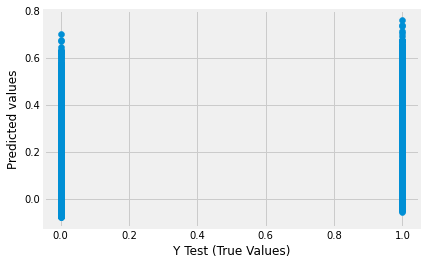

In [31]:
#Plotting
plt.scatter(y_test,pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [32]:
metrics.explained_variance_score(y_test,pred)

0.15063337457835357

In [33]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [35]:
dataset['Diabetic'] = dataset.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' or x == 'Yes (during pregnancy)' else x)
dataset.Diabetic.value_counts()

No     278993
Yes     40802
Name: Diabetic, dtype: int64

In [36]:
column_yesno = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

dataset[column_yesno] = dataset[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
dataset.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking     Sex  AgeCategory   Race  Diabetic  \
0          30.0            0  Female        55-59  White         1   
1           0.0            0  Female  80 or older  White         0   
2          30.0            0    Male        65-69  White         1   
3           0.0            0  Female        75-79  White         0   
4           0.0            1  Female        40-44  White         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1  Very good        5.0       1              0           1  
1                 1  Very good        7.0       0              0           0  
2                 1       Fair        8.0       1              0           0  
3                 0       Good        6.0       0              0           1  
4                 1  Very good        8.0       0              0           0

In [37]:
categoricals = dataset.select_dtypes(include=['object'])
categoricals.head()
df_dummies = pd.get_dummies(categoricals, drop_first=True)
df_dummies.head()
# Drop the redundant columns
dataset.drop(list(categoricals.columns), axis=1, inplace=True)
# concat the heart and dummies data frames.
dataset = pd.concat([dataset, df_dummies], axis=1)
dataset.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Diabetic  PhysicalActivity  ...  \
0          30.0            0         1                 1  ...   
1           0.0            0         0                 1  ...   
2          30.0            0         1                 1  ...   
3           0.0            0         0                 0  ...   
4           0.0            1         0                 1  ...   

   AgeCategory_80 or older  Race_Asian  Race_Black  Race_Hispanic  Race_Other  \
0                        0           0           0              0           0   
1                        1           0           0              0           0   
2                        0           0           0              0           0   
3                        0           0           0              0           0   
4                        0           0           0              0           0   

   Race_White  GenHealth_Fair  GenHealth_Good  GenHealth_Poor  \
0           1               0               0               0   
1           1               0               0               0   
2           1               1               0               0   
3           1               0               1               0   
4           1               0               0               0   

   GenHealth_Very good  
0                    1  
1                    1  
2                    0  
3                    0  
4                    1  

[5 rows x 36 columns]

In [40]:
#Using Decision Tree Regression because it can give more varied results and it can work with all options, and it needs no data conversion
x=dataset.iloc[:,1:13]
y=dataset[["BMI"]]
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x,y)
y_pred = dr.predict(x)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

1.3504256229272793e-25

In [41]:
y_pred[0:5]

array([16.6 , 20.34, 26.58, 24.21, 23.71])

In [54]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = lasso.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred3))  

40.539711809347786


In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 4, normalize = True)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred2))          

24.290079219999377


In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [71]:
person = [34,1,1,3, 1, 1, 1,1,1,1,0,0]
regressor.predict([person])

array([34.])